In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

## Stackoverflow 2023 Dataset

In [2]:
df2023 = pd.read_csv(r'D:\stack-overflow-developer-survey-2023\survey_results_public2023.csv')
df2023.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df2023.shape

(89184, 84)

In [4]:
# Check dimensions
print("Number of rows:", df2023.shape[0])
print("Number of columns:", df2023.shape[1])

# Check column names and data types
print(df2023.dtypes)


Number of rows: 89184
Number of columns: 84
ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object


In [5]:
print(df2023.columns.tolist())

['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFr

In [6]:
# Defining the list of columns to drop
drop_cols = ['ResponseId','Q120', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Currency', 'CompTotal', 
    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 
    'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 
    'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 
    'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 
    'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'SOAI', 'AISelect', 
    'AISent', 'AIAcc', 'AIBen', 'AIToolInterested in Using', 'AIToolCurrently Using', 'AIToolNot interested in Using', 
    'AINextVery different', 'AINextNeither different nor similar', 'AINextSomewhat similar', 'AINextVery similar', 
    'AINextSomewhat different', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 
    'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Frequency_1', 'Frequency_2', 
    'Frequency_3', 'TimeSearching', 'TimeAnswering','SurveyLength', 'SurveyEase']

# Drop the specified columns
df2023.drop(drop_cols, axis=1, inplace=True)


### Data Filtering - Sorting & Renaming


In [7]:
df2023.shape #checking rows and col after dropping the table

(89184, 25)

In [8]:
# Define the list of column names
cols = [
    'Age',
    'MainBranch',
    'Employment',
    'RemoteWork',
    'CodingActivities',
    'EdLevel',
    'LearnCode',
    'LearnCodeOnline',
    'LearnCodeCoursesCert',
    'YearsCode',
    'YearsCodePro',
    'DevType',
    'TechList',
    'Country',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith',
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith',
    'PlatformWantToWorkWith',
    'WebframeHaveWorkedWith',
    'WebframeWantToWorkWith',
    'ProfessionalTech',
    'Industry',
    'ConvertedCompYearly'
]

# Select the specified columns from df2018
df = df2023[cols]


In [9]:
#changing the name of columns for easier understanding
# 'MainBranch': 'Profession'
# 'ConvertedCompYearly': 'SalaryUSD'
df2023.rename(columns={'MainBranch': 'Profession', 'ConvertedCompYearly': 'SalaryUSD'}, 
                      inplace =True)

In [10]:
print(df2023.isnull().sum())

Profession                    0
Age                           0
Employment                 1286
RemoteWork                15374
CodingActivities          15420
EdLevel                    1211
LearnCode                  1521
LearnCodeOnline           19100
LearnCodeCoursesCert      52108
YearsCode                  1749
YearsCodePro              23048
DevType                   12312
TechList                  28333
Country                    1211
LanguageHaveWorkedWith     2044
LanguageWantToWorkWith     8475
DatabaseHaveWorkedWith    15749
DatabaseWantToWorkWith    28273
PlatformHaveWorkedWith    25556
PlatformWantToWorkWith    37876
WebframeHaveWorkedWith    22246
WebframeWantToWorkWith    32443
ProfessionalTech          47401
Industry                  52410
SalaryUSD                 41165
dtype: int64


In [11]:
df2023.sort_index(axis=1).head(2)

,Age,CodingActivities,Country,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DevType,EdLevel,Employment,Industry,LanguageHaveWorkedWith,...,PlatformWantToWorkWith,Profession,ProfessionalTech,RemoteWork,SalaryUSD,TechList,WebframeHaveWorkedWith,WebframeWantToWorkWith,YearsCode,YearsCodePro
0,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25-34 years old,Hobby;Contribute to open-source projects;Boots...,United States of America,Supabase,Firebase Realtime Database;Supabase,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time","Information Services, IT, Software Development...",HTML/CSS;JavaScript;Python,...,Fly.io;Netlify;Render,I am a developer by profession,DevOps function;Microservices;Automated testin...,Remote,285000.0,Investigate,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,18,9


In [12]:
df2023.shape


(89184, 25)

In [13]:
print(df2023.isnull().sum()) #Finding Null Values

Profession                    0
Age                           0
Employment                 1286
RemoteWork                15374
CodingActivities          15420
EdLevel                    1211
LearnCode                  1521
LearnCodeOnline           19100
LearnCodeCoursesCert      52108
YearsCode                  1749
YearsCodePro              23048
DevType                   12312
TechList                  28333
Country                    1211
LanguageHaveWorkedWith     2044
LanguageWantToWorkWith     8475
DatabaseHaveWorkedWith    15749
DatabaseWantToWorkWith    28273
PlatformHaveWorkedWith    25556
PlatformWantToWorkWith    37876
WebframeHaveWorkedWith    22246
WebframeWantToWorkWith    32443
ProfessionalTech          47401
Industry                  52410
SalaryUSD                 41165
dtype: int64


 ## Data Validation - Total Cells vs Missing %

In [14]:
#Find % of missing data
missing_count = df2023.isnull().sum() #number of missing
total_cells = np.product(df2023.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2229600
Total missing :  486311
Missing Percentage:  21.811580552565484 %


## Missing Percentage column-wise

In [15]:
def missing(df,column,n):
    empty_cells=df[column].isnull().sum()
    return (empty_cells*100.0)/n

In [16]:
total_cells=df2023.shape[0]
for column in df2023.columns:
    res=missing(df2023,column,total_cells)
    print(column,":","{:.2f}".format(res),"%")

Profession : 0.00 %
Age : 0.00 %
Employment : 1.44 %
RemoteWork : 17.24 %
CodingActivities : 17.29 %
EdLevel : 1.36 %
LearnCode : 1.71 %
LearnCodeOnline : 21.42 %
LearnCodeCoursesCert : 58.43 %
YearsCode : 1.96 %
YearsCodePro : 25.84 %
DevType : 13.81 %
TechList : 31.77 %
Country : 1.36 %
LanguageHaveWorkedWith : 2.29 %
LanguageWantToWorkWith : 9.50 %
DatabaseHaveWorkedWith : 17.66 %
DatabaseWantToWorkWith : 31.70 %
PlatformHaveWorkedWith : 28.66 %
PlatformWantToWorkWith : 42.47 %
WebframeHaveWorkedWith : 24.94 %
WebframeWantToWorkWith : 36.38 %
ProfessionalTech : 53.15 %
Industry : 58.77 %
SalaryUSD : 46.16 %


## Age Filtering          
### Data Cleaning Starts

In [17]:
df2023['Age'].value_counts().nlargest(10)

Age
25-34 years old       33247
35-44 years old       20532
18-24 years old       17931
45-54 years old        8334
Under 18 years old     4128
55-64 years old        3392
65 years or older      1171
Prefer not to say       449
Name: count, dtype: int64

In [18]:
df2023['Age'].isnull().sum()

0

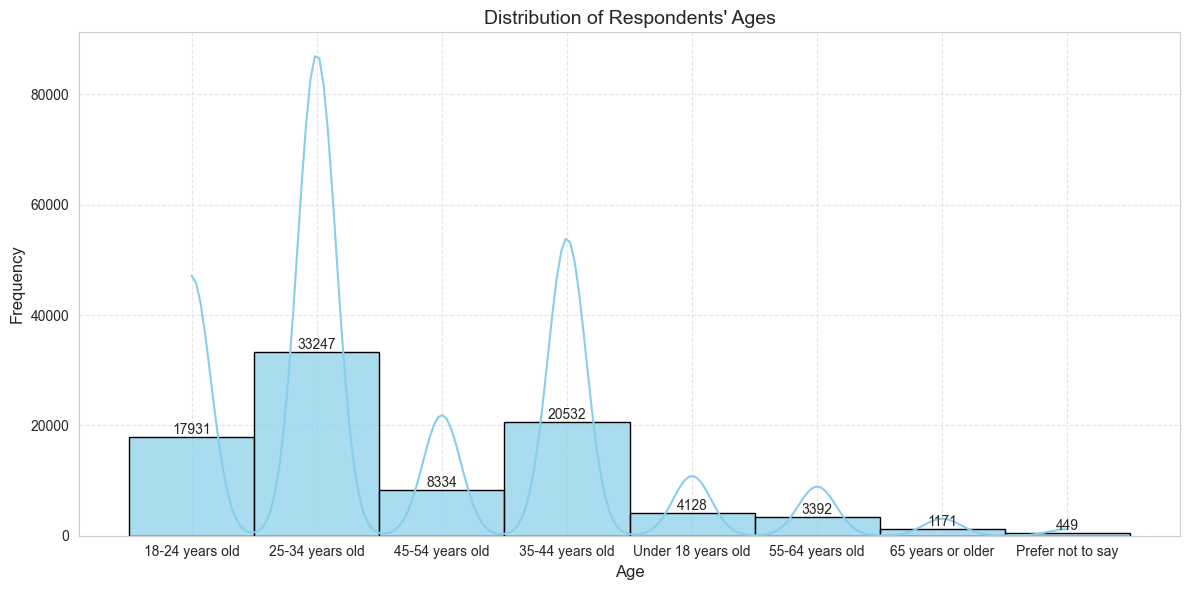

In [19]:
# Set the style
sns.set_style('whitegrid')

# Plotting the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df2023, x='Age', bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Age', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
plt.title('Distribution of Respondents\' Ages', fontsize=14)  # Title of the plot

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate each bar with its frequency
for rect in ax.patches:
    # Get the height of the bar
    height = rect.get_height()
    # Add text annotation
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


Overall, the histogram graph provides a clear overview of the distribution of respondents' ages in the survey dataset. The most common age group among the respondents is the 25-34 age range, with a frequency of 33,247 respondents. This is followed by the 18-24 age group, which has a frequency of 17,931 respondents. Interestingly, there is a noticeable decline in the number of respondents in the older age groups, with the 45-54 age group having a frequency of 8,334 respondents. These findings suggest that the survey respondents are predominantly younger individuals, with a smaller representation of older age groups. 

## EDlevel

In [20]:
df2023['EdLevel'].isnull().sum()

1211

In [21]:
df2023['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          36706
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       20543
Some college/university study without earning a degree                                11753
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8897
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         3887
Associate degree (A.A., A.S., etc.)                                                    2807
Primary/elementary school                                                              1905
Something else                                                                         1475
Name: count, dtype: int64

In [22]:
#Refactoring EdLevel
def refactor_ed(df):
    '''function to change Education level category to Bachelors, Masters, Professional, Associate, Doctorate, No Degree'''
    conditions_ed = [(df['EdLevel'] == 'Associate degree (A.A., A.S., etc.)'),
                    (df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'),
                    (df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'),
                    (df['EdLevel'] == 'Professional degree (JD, MD, etc.)'),   
                    (df['EdLevel'] == 'Other doctoral degree (Ph.D., Ed.D., etc.)'),
                    (df['EdLevel'] == 'Some college/university study without earning a degree') 
                    | (df['EdLevel'] == 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)') 
                    | (df['EdLevel'] == 'Primary/elementary school')
                    | (df['EdLevel'] == 'I never completed any formal education')]
    
    choices_ed = ['Associate', 'Bachelors', 'Masters', 'Professional',  'Doctorate', 'No Degree']
    df['EdLevel'] = np.select(conditions_ed, choices_ed, default = np.NaN)
    return df

# applying function to subsets
df2023 = refactor_ed(df2023)
#Assigining the surveyors who havent mentioned their education level to Bachelor’s degree
df2023['EdLevel'].replace('nan', 'Bachelors', inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19216\2322784076.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2023['EdLevel'].replace('nan', 'Bachelors', inplace=True)


In [23]:
df2023['EdLevel'].value_counts()

EdLevel
Bachelors    43279
No Degree    22555
Masters      20543
Associate     2807
Name: count, dtype: int64

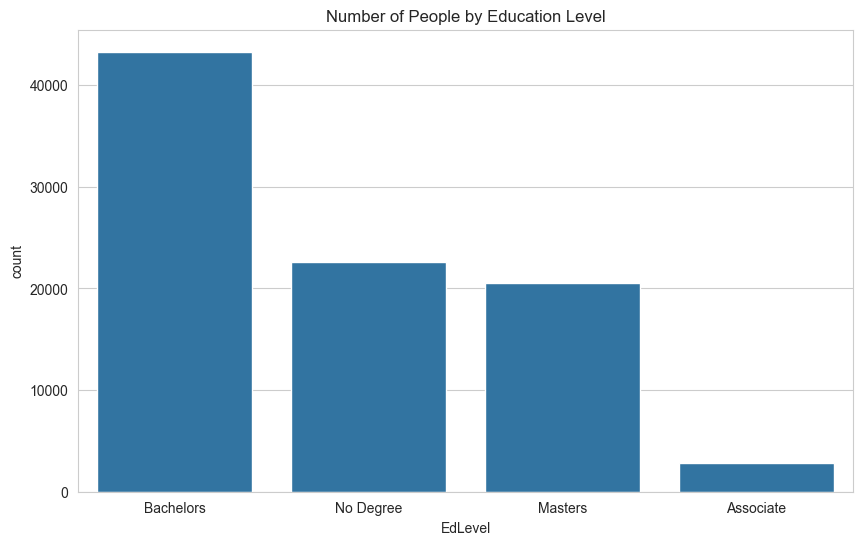

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EdLevel', data=df2023)
plt.title('Number of People by Education Level')
plt.show()


## DevType

In [25]:
df2023['DevType'].isnull().sum()

12312

In [26]:
df2023['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                            25735
Developer, back-end                              13745
Developer, front-end                              5071
Developer, desktop or enterprise applications     3904
Other (please specify):                           3080
Developer, mobile                                 2597
Engineering manager                               2033
Student                                           1996
Developer, embedded applications or devices       1845
Data scientist or machine learning specialist     1588
Name: count, dtype: int64

In [27]:
df2023['DevType'] = df2023['DevType'].bfill().ffill()

In [28]:
df2023['DevType'].value_counts().nlargest(10)

DevType
Developer, full-stack                            29898
Developer, back-end                              15791
Developer, front-end                              5920
Developer, desktop or enterprise applications     4535
Other (please specify):                           3591
Developer, mobile                                 2998
Student                                           2363
Engineering manager                               2322
Developer, embedded applications or devices       2139
Data scientist or machine learning specialist     1843
Name: count, dtype: int64

In [29]:
df2023.shape

(89184, 25)

In [30]:

df2023['DevType'].isnull().sum()

0

In [31]:
df2023[df2023['DevType'].isnull()]

,Profession,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ProfessionalTech,Industry,SalaryUSD


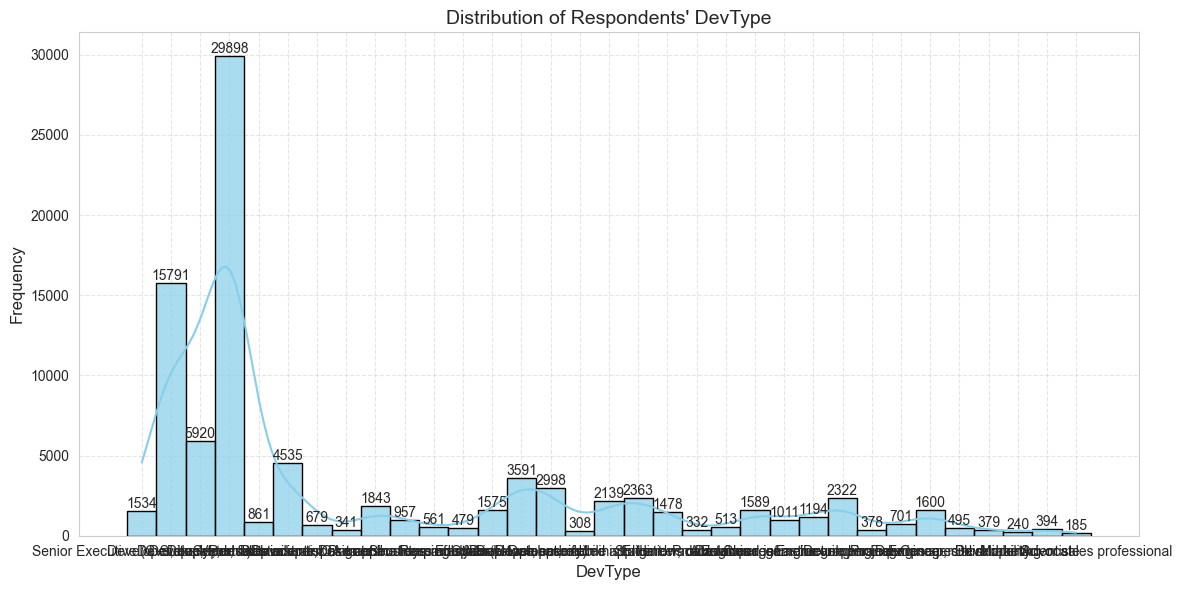

In [32]:
sns.set_style('whitegrid')

# Plotting the histogram
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df2023, x='DevType', bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('DevType', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
plt.title('Distribution of Respondents\' DevType', fontsize=14)  # Title of the plot

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.5)

# Annotate each bar with its frequency
for rect in ax.patches:
    # Get the height of the bar
    height = rect.get_height()
    # Add text annotation
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

## LanguageWantToWorkWith 

In [33]:
df2023['LanguageWantToWorkWith'].isnull().sum()

8475

In [34]:
df2023['LanguageWantToWorkWith'].value_counts().nlargest(10)

LanguageWantToWorkWith
Rust                              1438
Python                            1182
HTML/CSS;JavaScript;TypeScript    1071
C#                                 736
Go                                 618
TypeScript                         493
JavaScript;TypeScript              451
Java                               450
Python;Rust                        446
Python;SQL                         424
Name: count, dtype: int64

In [35]:
df2023['LanguageWantToWorkWith']=df2023['LanguageWantToWorkWith'].bfill().ffill()

In [36]:
df2023['LanguageWantToWorkWith'].value_counts().nlargest(10)

LanguageWantToWorkWith
Rust                              1584
Python                            1296
HTML/CSS;JavaScript;TypeScript    1189
C#                                 821
Go                                 682
TypeScript                         550
JavaScript;TypeScript              496
Java                               494
Python;Rust                        487
Go;Rust                            463
Name: count, dtype: int64

In [37]:
df2023['LanguageWantToWorkWith'].isnull().sum()

0

## LanguageHaveWorkedWith

In [38]:
df2023['LanguageHaveWorkedWith'].isnull().sum()

2044

In [39]:
df2023['LanguageHaveWorkedWith'].value_counts().nlargest(10)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript           1487
Python                                   1132
HTML/CSS;JavaScript                       735
HTML/CSS;JavaScript;PHP;SQL               718
C#                                        649
JavaScript;TypeScript                     590
C#;HTML/CSS;JavaScript;SQL;TypeScript     575
Java                                      573
Python;SQL                                460
C#;HTML/CSS;JavaScript;SQL                449
Name: count, dtype: int64

In [40]:
df2023['LanguageHaveWorkedWith']=df2023['LanguageHaveWorkedWith'].bfill().ffill()

In [41]:
df2023['LanguageHaveWorkedWith'].value_counts().nlargest(10)

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript           1518
Python                                   1155
HTML/CSS;JavaScript                       751
HTML/CSS;JavaScript;PHP;SQL               735
C#                                        663
JavaScript;TypeScript                     605
Java                                      592
C#;HTML/CSS;JavaScript;SQL;TypeScript     580
Python;SQL                                473
C#;HTML/CSS;JavaScript;SQL                457
Name: count, dtype: int64

In [42]:
df2023['LanguageHaveWorkedWith'].isnull().sum()

0

## Main Branch (Profession)

In [43]:
df2023['Profession'].isnull().sum()

0

In [44]:
df2023.groupby('Profession')['Profession'].count()

Profession
I am a developer by profession                                                           67237
I am learning to code                                                                     4961
I am not primarily a developer, but I write code sometimes as part of my work/studies     8954
I code primarily as a hobby                                                               4960
I used to be a developer by profession, but no longer am                                  1861
None of these                                                                             1211
Name: Profession, dtype: int64

In [45]:
df2023.dropna(subset=['Profession'], inplace = True)

In [46]:
#Lets refactor column values of Profession column
#refactoring profession column

def refactor_prof(df):
    '''function to change Profession category to Developer, Student, Non-Developer, Novoice, Ex-Developer'''
    conditions_prof = [(df['Profession'] == 'I am a developer by profession'),
                       (df['Profession'] == 'I am a student who is learning to code'),
                       (df['Profession'] == 'I am not primarily a developer, but I write code sometimes as part of my work'),
                       (df['Profession'] == 'I code primarily as a hobby'),
                       (df['Profession'] == 'I used to be a developer by profession, but no longer am')]
    
    choices_prof = ['Developer', 'Student', 'Non developer', 'Novoice', 'Ex-Developer']
    df['Profession'] = np.select(conditions_prof, choices_prof, default=np.nan)          
    return df

df2023 = refactor_prof(df2023)

In [47]:
df2023['Profession'].value_counts()

Profession
Developer       67237
nan             15126
Novoice          4960
Ex-Developer     1861
Name: count, dtype: int64

In [48]:
df2023['Profession'].isnull().sum()

0

## Employment

In [49]:
df2023['Employment'].isnull().sum()

1286

In [50]:
df2023.groupby('Employment')['Employment'].count()

Employment
Employed, full-time                                                                             53748
Employed, full-time;Employed, part-time                                                           228
Employed, full-time;Employed, part-time;Student, part-time                                         23
Employed, full-time;Independent contractor, freelancer, or self-employed                         4354
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time      172
                                                                                                ...  
Student, full-time;Retired                                                                          1
Student, full-time;Student, part-time                                                              54
Student, full-time;Student, part-time;Not employed, and not looking for work                        6
Student, part-time                                                     

In [51]:
def refactor_employment(df):
    conditions_employment = [
        (df2023['Employment'].str.contains('full-time', na=False, case=False, regex=False)),
        (df2023['Employment'].str.contains('part-time', na=False, case=False, regex=False)),
        (df2023['Employment'].str.contains('contractor|freelancer|self-employed', na=False, case=False, regex=True)),
        (df2023['Employment'].str.contains('student', na=False, case=False, regex=False)),
        (df2023['Employment'].str.contains('retired', na=False, case=False, regex=False)),
        (df2023['Employment'].str.contains('not employed|looking for work', na=False, case=False, regex=True))
    ]
    
    choices_employment = ['Full-time', 'Part-time', 'Self-employed', 'Student', 'Retired', 'Unemployed']
    
    df2023['Employment'] = np.select(conditions_employment, choices_employment, default='Other')
    return df2023

df = refactor_employment(df2023)


In [52]:
df2023.groupby('Employment')['Employment'].count()

Employment
Full-time        71594
Other             1835
Part-time         4163
Retired            596
Self-employed     7566
Unemployed        3430
Name: Employment, dtype: int64

In [53]:
df2023['Employment']=df2023['Employment'].bfill().ffill()

In [54]:
df2023['Employment'].isnull().sum()

0

## Country

In [55]:
df2023['Country'].isnull().sum()

1211

In [56]:
df2023.groupby('Country')['Country'].count()

Country
Afghanistan                              64
Albania                                  60
Algeria                                  85
Andorra                                  16
Angola                                   13
                                       ... 
Venezuela, Bolivarian Republic of...    106
Viet Nam                                390
Yemen                                    20
Zambia                                   26
Zimbabwe                                 34
Name: Country, Length: 185, dtype: int64

In [57]:
df2023['Country']=df2023['Country'].bfill().ffill()

In [58]:
df2023['Country'].isnull().sum()

0

## YearsCodePro

In [59]:
df2023['YearsCodePro'].isnull().sum()

23048

In [60]:
df2023.groupby('YearsCodePro')['YearsCodePro'].count()

YearsCodePro
1                     2596
10                    4594
11                    2013
12                    2398
13                    1690
14                    1256
15                    2789
16                    1278
17                    1146
18                    1212
19                     649
2                     4464
20                    2227
21                     565
22                     845
23                    1112
24                     686
25                    1449
26                     486
27                     490
28                     417
29                     217
3                     4378
30                     924
31                     187
32                     293
33                     264
34                     177
35                     462
36                     200
37                     150
38                     164
39                      99
4                     3970
40                     329
41                      79
42             

In [61]:
df2023['YearsCodePro']=df2023['YearsCodePro'].bfill().ffill()

In [62]:
df2023['YearsCodePro'].isnull().sum()

0

## ConvertedCompYearly (SalaryUSD)

In [63]:
df2023['SalaryUSD'].isnull().sum()

41165

In [64]:
df2023['SalaryUSD'].value_counts().nlargest()

SalaryUSD
64254.0     784
53545.0     615
150000.0    585
200000.0    558
74963.0     557
Name: count, dtype: int64

In [65]:
mean_salary = df2023.groupby(['Age','EdLevel','Country'])['SalaryUSD'].mean()
mean_salary.nlargest(10)

Age                 EdLevel    Country     
25-34 years old     Bachelors  Mali            3.657318e+07
Under 18 years old  No Degree  Ethiopia        1.761292e+07
25-34 years old     No Degree  Thailand        7.237654e+06
                    Bachelors  Afghanistan     2.301448e+06
55-64 years old     Bachelors  Australia       1.973625e+06
25-34 years old     Masters    Nomadic         1.617763e+06
45-54 years old     No Degree  Thailand        1.482846e+06
35-44 years old     Bachelors  South Africa    1.456551e+06
25-34 years old     Associate  Nigeria         9.856870e+05
55-64 years old     Bachelors  Belgium         8.735447e+05
Name: SalaryUSD, dtype: float64

In [66]:
df2023['SalaryUSD'].value_counts().nlargest()

SalaryUSD
64254.0     784
53545.0     615
150000.0    585
200000.0    558
74963.0     557
Name: count, dtype: int64

## Remote Work

In [67]:
df2023['RemoteWork'].isnull().sum()

15374

In [68]:
df2023['RemoteWork'].value_counts().nlargest(10)

RemoteWork
Hybrid (some remote, some in-person)    31131
Remote                                  30566
In-person                               12113
Name: count, dtype: int64

In [69]:
df2023['RemoteWork']=df2023['RemoteWork'].bfill().ffill()

In [70]:
df2023['RemoteWork'].isnull().sum()

0

## Coding Activities

In [71]:
df2023['CodingActivities'].isnull().sum()

15420

In [72]:
df2023['CodingActivities'].value_counts().nlargest(10)

CodingActivities
Hobby                                                                                                           15308
I don’t code outside of work                                                                                     8809
Hobby;Professional development or self-paced learning from online courses                                        8232
Hobby;Contribute to open-source projects                                                                         5363
Professional development or self-paced learning from online courses                                              3920
Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses     3194
Hobby;Freelance/contract work                                                                                    2266
Hobby;School or academic work                                                                                    1855
Hobby;Professional development or self-

In [73]:
df2023['CodingActivities']=df2023['CodingActivities'].bfill().ffill()

In [74]:
df2023['CodingActivities'].isnull().sum()

0

## LearnCodeOnline

In [75]:
df2023['LearnCodeOnline'].isnull().sum()

19100

In [76]:
df2023['LearnCodeOnline'].value_counts().nlargest(10)

LearnCodeOnline
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials;Click to write Choice 20;Stack Overflow                        1182
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Written Tutorials;Stack Overflow                                                  977
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Stack Overflow                                                                    802
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Written Tutorials;Click to write Choice 20;Stack Overflow           770
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Written Tutorials;Click to write Choice 20;Stack Overflow                   768
Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Written Tutorials;Stack Overflow                        

In [77]:
def refactor_learn_code_online(df):
    conditions_learn_code_online = [
        (df['LearnCodeOnline'].str.contains('Online Courses', na=False, regex=True)),
        (df['LearnCodeOnline'].str.contains('Books', na=False, regex=True)),
        (df['LearnCodeOnline'].str.contains('On the job training', na=False, regex=True)),
        (df['LearnCodeOnline'].str.contains('School', na=False, regex=True)),
        (df['LearnCodeOnline'].str.contains('Other online resources', na=False, regex=True))
    ]
    
    choices_learn_code_online = ['OnlineCourses/Certification', 'Books/Physicalmedia', 'OntheJobTraining',
                                 'School', 'OtherOnlineResources']
    
    df['LearnCodeOnline'] = np.select(conditions_learn_code_online, choices_learn_code_online, default='Other')
    return df

df = refactor_learn_code_online(df)


In [78]:
df2023['LearnCodeOnline'].value_counts().nlargest(10)

LearnCodeOnline
OnlineCourses/Certification    42195
Other                          36789
Books/Physicalmedia            10200
Name: count, dtype: int64

In [79]:
# Split the values in the 'LearnCodeOnline' column by semicolon and stack them into separate rows
learn_code_online_split = df['LearnCodeOnline'].str.split(';').apply(pd.Series).stack()

# Count the occurrences of each unique combination
learn_code_online_counts = learn_code_online_split.value_counts()

# Display the result
print(learn_code_online_counts)


OnlineCourses/Certification    42195
Other                          36789
Books/Physicalmedia            10200
Name: count, dtype: int64


In [80]:
df2023['LearnCodeOnline']=df2023['LearnCodeOnline'].bfill().ffill()

In [81]:
df2023['LearnCodeOnline'].isnull().sum()

0

## LearnCode

In [82]:
df2023['LearnCode'].isnull().sum()

1521

In [83]:
df2023['LearnCode'].value_counts().nlargest(10)

LearnCode
Other online resources (e.g., videos, blogs, forum)                                                                                                                       4873
Books / Physical media;Other online resources (e.g., videos, blogs, forum)                                                                                                3300
Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                                               3070
Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                                3024
Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                                                       2871
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc) 

In [84]:
def refactor_learn_code(df):
    conditions_learn_code = [
        (df['LearnCode'].str.contains('Online Courses|Certification', na=False, regex=True)),
        (df['LearnCode'].str.contains('Books|Physical media', na=False, regex=True)),
        (df['LearnCode'].str.contains('On the job training', na=False, regex=True)),
        (df['LearnCode'].str.contains('School', na=False, regex=True)),
        (df['LearnCode'].str.contains('Other online resources', na=False, regex=True))
    ]
    
    choices_learn_code = ['OnlineCourses/Certification', 'Books/Physicalmedia', 'OntheJobTraining',
                          'School', 'OtherOnlineResources']
    
    df['LearnCode'] = np.select(conditions_learn_code, choices_learn_code, default='Other')
    return df

df = refactor_learn_code(df)


In [85]:
df2023['LearnCode'].value_counts().nlargest(10)

LearnCode
OnlineCourses/Certification    43201
Books/Physicalmedia            20777
OntheJobTraining                8479
School                          7110
OtherOnlineResources            6857
Other                           2760
Name: count, dtype: int64

In [86]:
# Split the values in the 'LearnCode' column by semicolon and stack them into separate rows
learn_code_split = df['LearnCode'].str.split(';').apply(pd.Series).stack()

# Count the occurrences of each unique combination
learn_code_counts = learn_code_split.value_counts()

# Display the result
print(learn_code_counts)


OnlineCourses/Certification    43201
Books/Physicalmedia            20777
OntheJobTraining                8479
School                          7110
OtherOnlineResources            6857
Other                           2760
Name: count, dtype: int64


In [87]:
df2023['LearnCode']=df2023['LearnCode'].bfill().ffill()

In [88]:
df2023['LearnCode'].isnull().sum()

0

## LearnCodeCoursesCert

In [89]:
df2023['LearnCodeCoursesCert'].isnull().sum()

52108

In [90]:
df2023['LearnCodeCoursesCert'].value_counts().nlargest(10)

LearnCodeCoursesCert
Udemy                        7445
Other                        3230
Udemy;Coursera               2612
Udemy;Pluralsight            1958
Codecademy;Udemy             1837
Coursera                     1634
Pluralsight                  1619
Other;Udemy                  1370
Codecademy                   1248
Codecademy;Udemy;Coursera     841
Name: count, dtype: int64

In [91]:
df2023['LearnCodeCoursesCert']=df2023['LearnCodeCoursesCert'].bfill().ffill()

In [92]:
df2023['LearnCodeCoursesCert'].isnull().sum()

0

## YearsCode

In [93]:
df2023['YearsCode'].isnull().sum()

1749

In [94]:
df2023['YearsCode'].value_counts().nlargest(10)

YearsCode
10    6521
5     5415
6     4893
8     4879
7     4800
4     4466
15    4336
3     4269
20    4021
12    3471
Name: count, dtype: int64

In [95]:
df2023['YearsCode']=df2023['YearsCode'].bfill().ffill()

In [96]:
df2023['YearsCode'].isnull().sum()

0

## TechList

In [97]:
df2023['TechList'].isnull().sum()

28333

In [98]:
df2023['TechList'].value_counts().nlargest(10)

TechList
Investigate     49212
Given a list     7935
Other            3704
Name: count, dtype: int64

In [99]:
df2023['TechList']=df2023['TechList'].bfill().ffill()

In [100]:
df2023['TechList'].isnull().sum()

0

## DatabaseHaveWorkedWith

In [101]:
df2023['DatabaseHaveWorkedWith'].isnull().sum()

15749

In [102]:
df2023['DatabaseHaveWorkedWith'].value_counts().nlargest(10)

DatabaseHaveWorkedWith
PostgreSQL              4350
Microsoft SQL Server    3322
MySQL                   3116
SQLite                  2299
MongoDB                 1663
PostgreSQL;SQLite       1426
PostgreSQL;Redis        1024
MariaDB;MySQL           1001
MySQL;SQLite             969
MySQL;PostgreSQL         945
Name: count, dtype: int64

In [103]:
df2023['DatabaseHaveWorkedWith']=df2023['DatabaseHaveWorkedWith'].bfill().ffill()

In [104]:
df2023['DatabaseHaveWorkedWith'].value_counts().nlargest(10)

DatabaseHaveWorkedWith
PostgreSQL              5268
Microsoft SQL Server    4044
MySQL                   3776
SQLite                  2771
MongoDB                 2077
PostgreSQL;SQLite       1728
PostgreSQL;Redis        1255
MariaDB;MySQL           1232
MySQL;SQLite            1180
MySQL;PostgreSQL        1126
Name: count, dtype: int64

In [105]:
df2023['DatabaseHaveWorkedWith'].isnull().sum()

0

## DatabaseWantToWorkWith

In [106]:
df2023['DatabaseWantToWorkWith'].isnull().sum()

28273

In [107]:
df2023['DatabaseWantToWorkWith'].value_counts().nlargest(10)

DatabaseWantToWorkWith
PostgreSQL                 4815
Microsoft SQL Server       2180
SQLite                     1771
MySQL                      1754
PostgreSQL;SQLite          1631
MongoDB                    1609
PostgreSQL;Redis           1414
MongoDB;PostgreSQL          772
MySQL;PostgreSQL            625
PostgreSQL;Redis;SQLite     582
Name: count, dtype: int64

In [108]:
df2023['DatabaseWantToWorkWith']=df2023['DatabaseWantToWorkWith'].bfill().ffill()

In [109]:
df2023['DatabaseWantToWorkWith'].value_counts().nlargest(10)

DatabaseWantToWorkWith
PostgreSQL                 7082
Microsoft SQL Server       3131
MySQL                      2566
SQLite                     2557
PostgreSQL;SQLite          2412
MongoDB                    2315
PostgreSQL;Redis           2091
MongoDB;PostgreSQL         1112
MySQL;PostgreSQL            922
PostgreSQL;Redis;SQLite     848
Name: count, dtype: int64

In [110]:
df2023['DatabaseWantToWorkWith'].isnull().sum()

0

## PlatformHaveWorkedWith

In [111]:
df2023['PlatformHaveWorkedWith'].isnull().sum()

25556

In [112]:
df2023['PlatformHaveWorkedWith'].value_counts().nlargest(10)

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                 9804
Microsoft Azure                                           5945
Google Cloud                                              2495
Amazon Web Services (AWS);Microsoft Azure                 2192
Amazon Web Services (AWS);Google Cloud                    1810
Firebase                                                  1407
Amazon Web Services (AWS);Cloudflare                       822
Digital Ocean                                              819
VMware                                                     798
Amazon Web Services (AWS);Google Cloud;Microsoft Azure     795
Name: count, dtype: int64

In [113]:
df2023['PlatformHaveWorkedWith']=df2023['PlatformHaveWorkedWith'].bfill().ffill()

In [114]:
df2023['PlatformHaveWorkedWith'].value_counts().nlargest(10)

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                 13558
Microsoft Azure                                            8296
Google Cloud                                               3430
Amazon Web Services (AWS);Microsoft Azure                  3100
Amazon Web Services (AWS);Google Cloud                     2608
Firebase                                                   1974
Amazon Web Services (AWS);Cloudflare                       1155
Digital Ocean                                              1140
VMware                                                     1107
Amazon Web Services (AWS);Google Cloud;Microsoft Azure     1094
Name: count, dtype: int64

In [115]:
df2023['PlatformHaveWorkedWith'].isnull().sum()

0

## PlatformWantToWorkWith

In [116]:
df2023['PlatformWantToWorkWith'].isnull().sum()

37876

In [117]:
df2023['PlatformWantToWorkWith'].value_counts().nlargest(10)

PlatformWantToWorkWith
Amazon Web Services (AWS)                                 7269
Microsoft Azure                                           4239
Amazon Web Services (AWS);Microsoft Azure                 2023
Google Cloud                                              1885
Amazon Web Services (AWS);Google Cloud                    1695
Amazon Web Services (AWS);Google Cloud;Microsoft Azure    1028
Firebase                                                   883
Vercel                                                     864
Digital Ocean                                              863
Amazon Web Services (AWS);Cloudflare                       793
Name: count, dtype: int64

In [118]:
df2023['PlatformWantToWorkWith']=df2023['PlatformWantToWorkWith'].bfill().ffill()

In [119]:
df2023['PlatformWantToWorkWith'].isnull().sum()

0

## WebframeHaveWorkedWith

In [120]:
df2023['WebframeHaveWorkedWith'].isnull().sum()

22246

In [121]:
df2023['WebframeHaveWorkedWith'].value_counts().nlargest(10)

WebframeHaveWorkedWith
React                    2017
Spring Boot              1479
Node.js                  1452
Node.js;React            1161
Flask                    1069
WordPress                 972
jQuery                    908
Django                    862
ASP.NET CORE              818
Express;Node.js;React     807
Name: count, dtype: int64

In [122]:
df2023['WebframeHaveWorkedWith']=df2023['WebframeHaveWorkedWith'].bfill().ffill()

In [123]:
df2023['WebframeHaveWorkedWith'].isnull().sum()

0

## WebframeWantToWorkWith

In [124]:
df2023['WebframeWantToWorkWith'].isnull().sum()

32443

In [125]:
df2023['WebframeWantToWorkWith'].value_counts().nlargest(10)

WebframeWantToWorkWith
React                    1561
Spring Boot              1200
Node.js                   973
ASP.NET CORE              841
Svelte                    840
Node.js;React             810
ASP.NET CORE;Blazor       753
Next.js;Node.js;React     711
FastAPI                   703
Angular                   594
Name: count, dtype: int64

In [126]:
df2023['WebframeWantToWorkWith']=df2023['WebframeWantToWorkWith'].bfill().ffill()

In [127]:
df2023['WebframeWantToWorkWith'].isnull().sum()

0

## ProfessionalTech

In [128]:
df2023['ProfessionalTech'].isnull().sum()

47401

In [129]:
df2023['ProfessionalTech'].value_counts().nlargest(10)

ProfessionalTech
None of these                                                                                                                                                                                                                                                 4871
DevOps function;Microservices;Automated testing;Observability tools;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery                                                          2618
DevOps function;Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery                                                                                                                          2271
DevOps function;Microservices;Automated testing;Continuous integration (CI) and (more often) continuous delivery                                                                                              

In [130]:
def refactor_professional_tech(df):
    conditions_prof_tech = [(df['ProfessionalTech'].str.contains('Microservices', na=False)),
                            (df['ProfessionalTech'].str.contains('Developer portal|central places to find tools/services', na=False)),
                            (df['ProfessionalTech'].str.contains('Continuous integration|continuous delivery', na=False)),
                            (df['ProfessionalTech'].str.contains('DevOps function', na=False)),
                            (df['ProfessionalTech'].str.contains('Automated testing', na=False)),
                            (df['ProfessionalTech'].str.contains('Observability tools', na=False)),
                            (df['ProfessionalTech'].str.contains('AI-assisted technology tool(s)', na=False))]
    
    choices_prof_tech = ['Microservices', 'Developer Tools', 'Continuous Integration/Delivery', 'DevOps',
                         'Automated Testing', 'Observability', 'AI-assisted Tools']
    
    df['ProfessionalTech'] = np.select(conditions_prof_tech, choices_prof_tech, default='Other')
    return df

df2023 = refactor_professional_tech(df2023)


C:\Users\Dell\AppData\Local\Temp\ipykernel_19216\3503850458.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['ProfessionalTech'].str.contains('AI-assisted technology tool(s)', na=False))]


In [131]:
df2023['ProfessionalTech'].value_counts().nlargest(10)

ProfessionalTech
Other                              52802
Microservices                      20526
Continuous Integration/Delivery     8016
Developer Tools                     5636
DevOps                              1383
Automated Testing                    624
Observability                        197
Name: count, dtype: int64

In [132]:
df2023['ProfessionalTech']=df2023['ProfessionalTech'].bfill().ffill()

In [133]:
df2023['ProfessionalTech'].isnull().sum()

0

## Industry

In [134]:
df2023['Industry'].isnull().sum()

52410

In [135]:
df2023['Industry'].value_counts().nlargest(10)

Industry
Information Services, IT, Software Development, or other Technology    18159
Financial Services                                                      4421
Other                                                                   4011
Manufacturing, Transportation, or Supply Chain                          2607
Healthcare                                                              2216
Retail and Consumer Services                                            1955
Higher Education                                                        1242
Advertising Services                                                     786
Insurance                                                                707
Oil & Gas                                                                276
Name: count, dtype: int64

In [136]:
df2023['Industry']=df2023['Industry'].bfill().ffill()

In [137]:
df2023['Industry'].isnull().sum()

0

## Cleaned_Dataset_2023

In [138]:
print(df2023.isnull().sum())

Profession                    0
Age                           0
Employment                    0
RemoteWork                    0
CodingActivities              0
EdLevel                       0
LearnCode                     0
LearnCodeOnline               0
LearnCodeCoursesCert          0
YearsCode                     0
YearsCodePro                  0
DevType                       0
TechList                      0
Country                       0
LanguageHaveWorkedWith        0
LanguageWantToWorkWith        0
DatabaseHaveWorkedWith        0
DatabaseWantToWorkWith        0
PlatformHaveWorkedWith        0
PlatformWantToWorkWith        0
WebframeHaveWorkedWith        0
WebframeWantToWorkWith        0
ProfessionalTech              0
Industry                      0
SalaryUSD                 41165
dtype: int64


In [139]:
#resetting the index values
df2020 = df2023.reset_index(drop=True)

In [140]:
df2023.head(5)

,Profession,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,ProfessionalTech,Industry,SalaryUSD
0,nan,18-24 years old,Other,Remote,Hobby;Contribute to open-source projects;Boots...,Bachelors,Other,Other,Other,18,...,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Other,"Information Services, IT, Software Development...",NaN
1,Developer,25-34 years old,Full-time,Remote,Hobby;Contribute to open-source projects;Boots...,Bachelors,OnlineCourses/Certification,OnlineCourses/Certification,Other,18,...,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Microservices,"Information Services, IT, Software Development...",285000.0
2,Developer,45-54 years old,Full-time,"Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,Bachelors,Books/Physicalmedia,Other,Other;Codecademy;edX,27,...,Haskell;OCaml;Rust,PostgreSQL;Redis,PostgreSQL;Redis,Amazon Web Services (AWS);Google Cloud;OpenSta...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Microservices,"Information Services, IT, Software Development...",250000.0
3,Developer,25-34 years old,Full-time,"Hybrid (some remote, some in-person)",Hobby,Bachelors,School,Other,Other;Codecademy;edX,12,...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,Continuous Integration/Delivery,Other,156000.0
4,Developer,25-34 years old,Full-time,Remote,Hobby;Contribute to open-source projects;Profe...,Bachelors,OnlineCourses/Certification,OnlineCourses/Certification,Other;Codecademy;edX,6,...,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,Microservices,Other,23456.0


In [141]:
df2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Profession              89184 non-null  object 
 1   Age                     89184 non-null  object 
 2   Employment              89184 non-null  object 
 3   RemoteWork              89184 non-null  object 
 4   CodingActivities        89184 non-null  object 
 5   EdLevel                 89184 non-null  object 
 6   LearnCode               89184 non-null  object 
 7   LearnCodeOnline         89184 non-null  object 
 8   LearnCodeCoursesCert    89184 non-null  object 
 9   YearsCode               89184 non-null  object 
 10  YearsCodePro            89184 non-null  object 
 11  DevType                 89184 non-null  object 
 12  TechList                89184 non-null  object 
 13  Country                 89184 non-null  object 
 14  LanguageHaveWorkedWith  89184 non-null

## After Cleaning Dataset 2023

In [142]:
#Find % of missing data
missing_count = df2023.isnull().sum() #number of missing
total_cells = np.product(df2023.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  2229600
Total missing :  41165
Missing Percentage:  1.8462952996053104 %


In [143]:
%store df2023

Stored 'df2023' (DataFrame)
